In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
orders=pd.read_excel('orders.xlsx')
orders.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130


In [4]:
products=pd.read_excel('products.xlsx')
products.head()

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio


In [5]:
df_merge = orders.merge(products, on='product_id', how='left')
df_merge.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат


Самая ходовая товарная группа

In [6]:
df = df_merge.groupby('level1')['quantity'].agg(cnt='sum').reset_index().sort_values('cnt', ascending=False)
df

,level1,cnt
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239
25,Хлеб и хлебобулочные изделия,218
21,Снэки,212
20,Свежие фрукты,184
6,Замороженная продукция,175
7,Кондитерские изделия,138


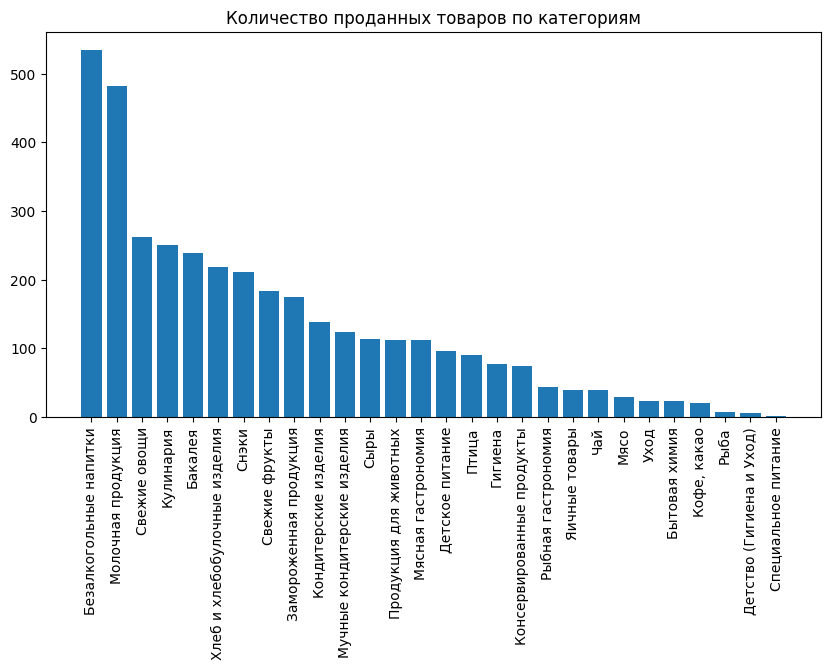

In [7]:
plt.figure(figsize=(10, 5))
plt.bar(df['level1'], df['cnt'])
plt.xticks(rotation=90)
plt.title('Количество проданных товаров по категориям');

Распределение продаж по подкатегориям

In [8]:
piv_df = df_merge.groupby(['level1', 'level2'])['quantity'].agg(cnt='sum').reset_index().sort_values('cnt', ascending=False)
piv_df.head()

,level1,level2,cnt
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180
12,Безалкогольные напитки,Воды питьевые,162


Найти средний чек в заданную дату - 13.01.2022

In [9]:
date_for_check = ('13.01.2022')
df_merge['date']= pd.to_datetime(df_merge['accepted_at']).dt.strftime('%d.%m.%Y')
df_check = df_merge[df_merge['date']==date_for_check]
df_check

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,date
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,13.01.2022
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,13.01.2022
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,13.01.2022
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022
...,...,...,...,...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13 19:29:44,79337,2,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат,13.01.2022
3319,1517676281,2022-01-13 08:21:53,79337,1,105,105,54,Замороженная продукция,Мороженое,Мороженое Магнат,13.01.2022
3320,1517545392,2022-01-13 13:16:21,11897,1,513,513,392,Продукция для животных,Товары для кошек,Корм Perfect Fit,13.01.2022
3321,1517658904,2022-01-13 08:50:25,6392,2,79,79,45,Мучные кондитерские изделия,Хлебцы,Хлебцы Dr. Korner,13.01.2022


In [10]:
sum_check=df_check.groupby('order_id').apply(lambda x: (x['quantity']*x['price']).sum()).mean()
avg_check = round(float(sum_check),2)
avg_check 

C:\Users\lenic\AppData\Local\Temp\ipykernel_8760\1418073124.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sum_check=df_check.groupby('order_id').apply(lambda x: (x['quantity']*x['price']).sum()).mean()


915.64

Доля промо в заданной категории "Сыры"

In [11]:
df_merge['promo'] = np.where(df_merge['regular_price']==df_merge['price'], 'Обычная цена', 'Промо')
df_cheese=df_merge[df_merge['level1']=='Сыры']
df_cheese.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,date,promo
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022,Обычная цена
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022,Обычная цена
5,1517416615,2022-01-13 10:39:06,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022,Обычная цена
6,1517577392,2022-01-13 11:50:14,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022,Обычная цена
64,1517374975,2022-01-13 12:42:34,2922,1,239,239,136,Сыры,Мягкие сыры,Сыр Страчателла Самокат,13.01.2022,Обычная цена


In [12]:
cheese_promo = df_cheese.groupby('promo')['quantity'].agg(sum='sum').reset_index()
cheese_promo['dol']=round(cheese_promo['sum']/sum(cheese_promo['sum']) *100, 2)
cheese_promo

,promo,sum,dol
0,Обычная цена,79,69.3
1,Промо,35,30.7


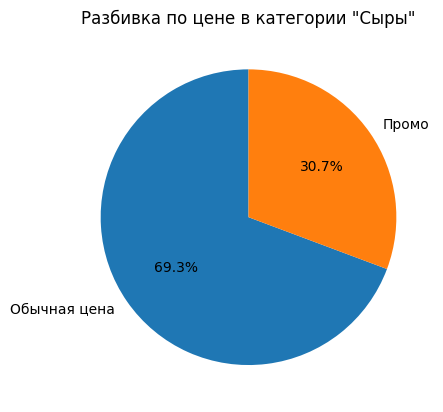

In [13]:
plt.pie(cheese_promo['dol'], labels=cheese_promo['promo'], startangle=90, autopct='%1.1f%%')
plt.title('Разбивка по цене в категории "Сыры"');

Посчитать маржинальную прибыль по категориям

In [14]:
df_merge['sum_price']= df_merge['price']*df_merge['quantity']
df_merge['sum_cost_price']= df_merge['cost_price']*df_merge['quantity']
df_merge.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name,date,promo,sum_price,sum_cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,13.01.2022,Обычная цена,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,13.01.2022,Обычная цена,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан,13.01.2022,Обычная цена,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022,Обычная цена,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат,13.01.2022,Обычная цена,219,130


In [15]:
profit = df_merge.groupby('level1')[['sum_price','sum_cost_price']].agg({'sum_price':'sum', 'sum_cost_price':'sum'}).reset_index()
profit['profit_sum']=profit['sum_price']-profit['sum_cost_price']
profit['profit_pr']=round((profit['sum_price']-profit['sum_cost_price'])/profit['sum_price'] * 100,2)
profit


,level1,sum_price,sum_cost_price,profit_sum,profit_pr
0,Бакалея,21766,13589,8177,37.57
1,Безалкогольные напитки,46107,25734,20373,44.19
2,Бытовая химия,5478,4037,1441,26.31
3,Гигиена,10055,7084,2971,29.55
4,Детское питание,5091,3274,1817,35.69
5,Детство (Гигиена и Уход),1729,1212,517,29.90
6,Замороженная продукция,27714,14615,13099,47.26
7,Кондитерские изделия,13942,8024,5918,42.45
8,Консервированные продукты,10101,5947,4154,41.12
9,"Кофе, какао",9761,4702,5059,51.83


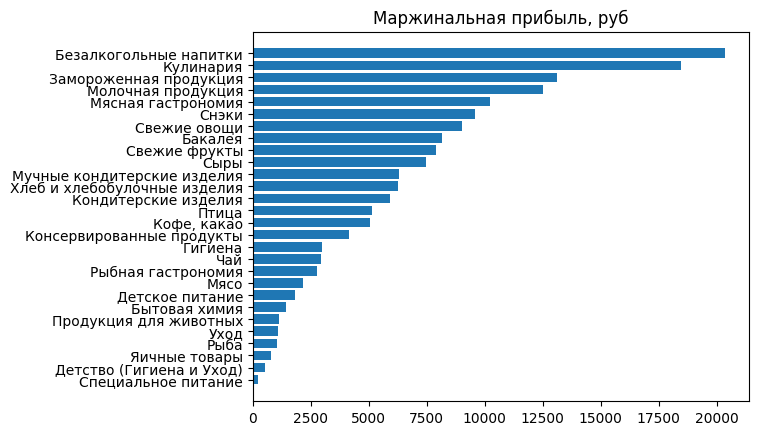

In [16]:
profit_sum = profit.sort_values('profit_sum')
plt.barh(profit_sum ['level1'], profit_sum ['profit_sum'])
plt.title('Маржинальная прибыль, руб');

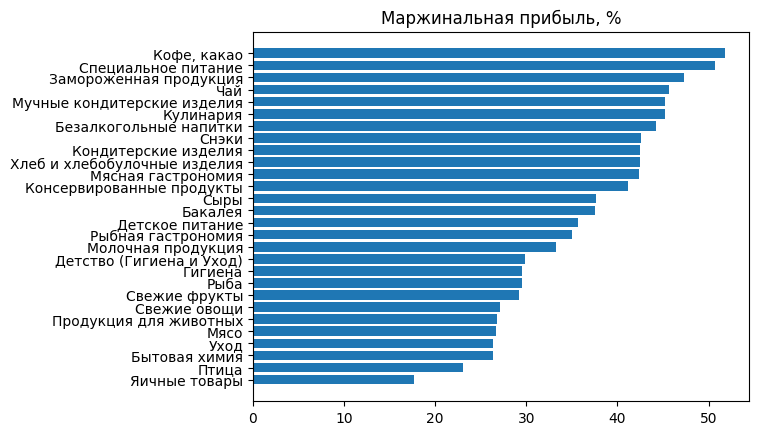

In [17]:
profit_pr = profit.sort_values('profit_pr')
plt.barh(profit_pr['level1'], profit_pr['profit_pr'])
plt.title('Маржинальная прибыль, %');

ABC-анализ

In [18]:
df_quantity=df_merge[['level2','quantity']]
df_sum_price=df_merge[['level2','sum_price']]

In [19]:
df_quantity=df_quantity.groupby('level2')['quantity'].sum().reset_index()
df_quantity['quantity_part']=df_quantity['quantity']/sum(df_quantity['quantity'])
df_quantity=df_quantity.sort_values('quantity_part', ascending=False)
df_quantity['cum_quantity_part']=df_quantity['quantity_part'].cumsum()
df_quantity['abc_q'] = np.where(df_quantity['cum_quantity_part']<0.8, 'A', np.where(df_quantity['cum_quantity_part']<0.95, 'B', 'C'))
df_quantity

,level2,quantity,quantity_part,cum_quantity_part,abc_q
51,Напитки,252,0.067524,0.067524,A
10,Готовые блюда,248,0.066452,0.133976,A
92,Хлеб и хлебобулочные изделия,218,0.058414,0.192390,A
72,Снэки соленые,180,0.048232,0.240622,A
6,Воды питьевые,162,0.043408,0.284030,A
...,...,...,...,...,...
56,Пасты кондитерские,2,0.000536,0.998392,C
81,Средства по уходу за волосами,2,0.000536,0.998928,C
82,Субпродуктовые изделия,2,0.000536,0.999464,C
77,Средства для сантехники,1,0.000268,0.999732,C


In [20]:
df_sum_price=df_sum_price.groupby('level2')['sum_price'].sum().reset_index()
df_sum_price['sum_price_part']=df_sum_price['sum_price']/sum(df_sum_price['sum_price'])
df_sum_price=df_sum_price.sort_values('sum_price_part', ascending=False)
df_sum_price['cum_sum_price_part']=df_sum_price['sum_price_part'].cumsum()
df_sum_price['abc_p'] = np.where(df_sum_price['cum_sum_price_part']<0.8, 'A', np.where(df_sum_price['cum_sum_price_part']<0.95, 'B', 'C'))
df_sum_price

,level2,sum_price,sum_price_part,cum_sum_price_part,abc_p
10,Готовые блюда,40356,0.090322,0.090322,A
51,Напитки,24123,0.053990,0.144312,A
50,Мясо птицы охлажденное,22349,0.050020,0.194332,A
85,"Тепличные овощи, грибы",18329,0.041023,0.235354,A
72,Снэки соленые,17293,0.038704,0.274058,A
...,...,...,...,...,...
77,Средства для сантехники,239,0.000535,0.998398,C
24,"Какао, горячий шоколад",238,0.000533,0.998930,C
91,Уход за одеждой и обувью,235,0.000526,0.999456,C
57,Первая помощь,168,0.000376,0.999832,C


In [21]:
abc=df_quantity.merge(df_sum_price, on='level2', how='left')
abc['abc']=abc['abc_q']+abc['abc_p']
abc = abc[['level2', 'quantity', 'sum_price', 'abc']]
abc.head()

,level2,quantity,sum_price,abc
0,Напитки,252,24123,AA
1,Готовые блюда,248,40356,AA
2,Хлеб и хлебобулочные изделия,218,14724,AA
3,Снэки соленые,180,17293,AA
4,Воды питьевые,162,9141,AA


In [22]:
abc['abc'].unique()

array(['AA', 'AB', 'AC', 'BB', 'BA', 'BC', 'CC', 'CB'], dtype=object)